In [3]:
import os
import numpy as np
import pandas as pd
# import pandas_profiling (沒裝profiling套件)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 設定 data_path, 並讀取 app_train
dir_data = "./RawData/"
f_app_train = os.path.join(dir_data, 'application_train.csv')
# print(dir_data)
app_train = pd.read_csv(f_app_train)
print(app_train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

## 練習時間
觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息

Eg

 計算任意欄位的平均數及標準差
 
 畫出任意欄位的直方圖

Hints:

Descriptive Statistics For pandas Dataframe 

pandas 中的繪圖函數


刪除空值前的行列數 = 307511, cols1 = 122
刪除空值後的行列數 = 8602, cols2 = 123
只保留非字串欄位 = 8602, cols3 = 86
                                     Mean    Median      Mode          Min  \
FLAG_DOCUMENT_7               0.000348756         0         0            0   
FLAG_DOCUMENT_11               0.00709137         0         0            0   
FLAG_DOCUMENT_16                0.0103464         0         0            0   
AMT_REQ_CREDIT_BUREAU_DAY      0.00592885         0         0            0   
REGION_RATING_CLIENT              2.00488         2         2            1   
CNT_FAM_MEMBERS                   2.40142         2         2            1   
AMT_INCOME_TOTAL                   222872    193500    225000        33750   
LIVINGAPARTMENTS_AVG             0.104852    0.0756    0.0504            0   
FLAG_DOCUMENT_4                         0         0         0            0   
REG_REGION_NOT_LIVE_REGION      0.0137177         0         0            0   
FLAG_DOCUMENT_21              0.000232504         0 

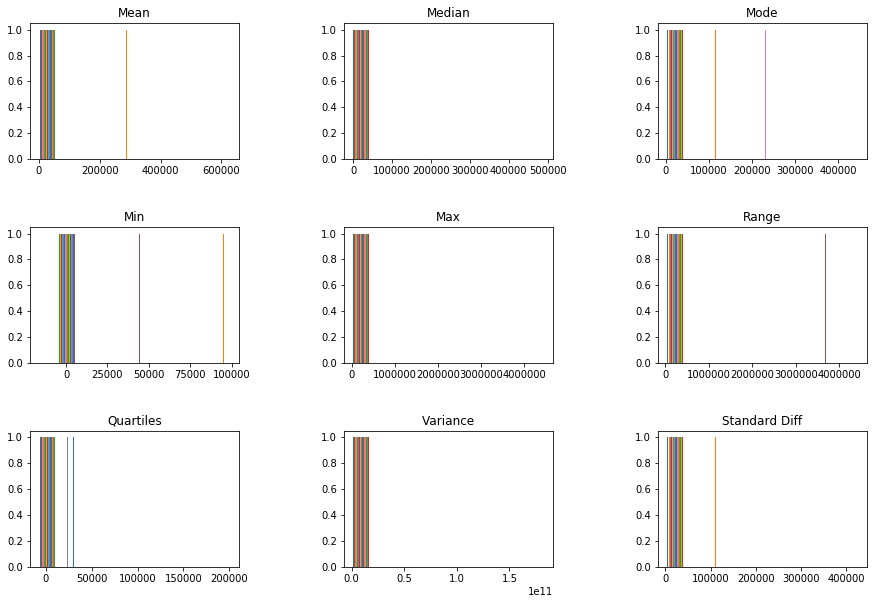

In [6]:
# 列出刪除空值前的行列數
(rows1, cols1) = app_train.shape
print(f'刪除空值前的行列數 = {rows1}, cols1 = {cols1}')

# 刪除空值(只要每列有出現1個空值就刪除該列)
app_train2 = app_train.dropna(axis='index', how='any')

# 重設index
app_train2 = app_train2.reset_index()
# print(app_train2)
# 列出刪除空值後的行列數
(rows2, cols2) = app_train2.shape
print(f'刪除空值後的行列數 = {rows2}, cols2 = {cols2}')

# 任意取出100個不重複的欄位 (有最大筆數限制!!!)
col_rand = np.random.choice(list(app_train2.head(0)), size=100, replace=False)
app_train3 = app_train2.loc[:, col_rand]

# 只保留非字串欄位
for column in app_train3.columns:
    value = app_train3.at[0, column]
    if (type(value) is str):
        try:
            pd.to_numeric(value)
        except ValueError:
            app_train3 = app_train3.drop(column, axis='columns')
            pass
(rows3, cols3) = app_train3.shape
print(f'只保留非字串欄位 = {rows3}, cols3 = {cols3}')
# print(app_train3.head(10))

# 建立資料量化輸出表格
index = app_train3.columns
columns = ['Mean','Median', 'Mode', 'Min', 'Max', 'Range', 'Quartiles', 'Variance', 'Standard Diff']
df = pd.DataFrame(index=index, columns=columns)

# 每個欄位各自計算
for column in app_train3.columns:
    # 平均值
    df['Mean'].loc[column] = app_train3[column].mean()
    # 中位數
    df['Median'].loc[column] = app_train3[column].median()
    # 眾數
    df['Mode'].loc[column] = app_train3[column].mode()[0]
    # 最小值
    df['Min'].loc[column] = app_train3[column].min()
    # 最大值
    df['Max'].loc[column] = app_train3[column].max()
    # 全距
    df['Range'].loc[column] = app_train3[column].max() - app_train3[column].min()
    # 四分位差(10%)
    df['Quartiles'].loc[column] = app_train3[column].quantile(0.1)
    # 變異數
    df['Variance'].loc[column] = app_train3[column].var()
    # 標準差
    df['Standard Diff'].loc[column] = app_train3[column].std()    
print(df)

# df = df.reset_index(drop=True)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for column in columns:
    plt.subplot((len(columns)//3) + (len(columns)%3), 3, (columns.index(column) + 1), title=column)
    df[column].hist(grid=False)